In [1]:
folder = 'LASSENA_RESID/'
import matplotlib.pyplot as plt
import numpy as np
import LASSENA_Readout as LAS
import HoughTransform as HT
data, dark, OnCheck, Myst = LAS.get_data_loc(folder)
integration_time = 28*10**(-3)
params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}

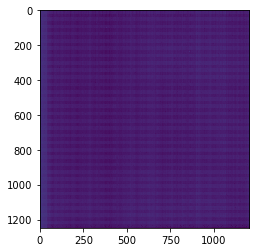

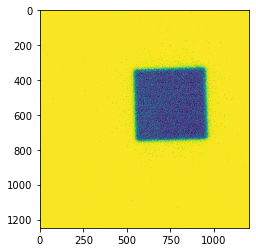

37
14
15
18
14
15
14
16
15
15
14
14
13
13
13
14
13
14
14
17
15
16
15
14
15
12
13
14
12
14
14
13
15
16
14
14
15
14
15
17
17
17
16
13
14
15
15
15
16
14
20
17
16
17
18
18
17
19
21
21
22
21
21
19
19
20
17
15
17
16
15
16
17
16
18
20
19
18
19
18
18
19
19
19
21
19
20
21
21
21
19
20
22
21
21
21
24
22
21
21
20
21
21
24
24
22
23
25
21
21
22
21
22
24
25
24
24
24
27
28
27
25
25
27
26
25
24
25
26
25
25
26
25
26
26
25
21
27
24
22
17
11
21
37
32
29
24
22
37
37
33
32
28
27
39
37
37
34
34
31
29
28
27
27
26
25
21
16
11
11
10
9
8
7
5
3
15
13
15
13
14
13
15
16
17
18
16
18
16
16
16
15
16
14
14
15
14
15
16
17
15
13
14
13
14
13
14
13
14
14
13
12
12
12
13
12
13
13
15
14
14
14
11
12
12
13
13
12
14
15
12
12
14
14
15
15
15
15
15
16
14
14
16
14
15
15
16
15
15
16
15
16
15
15
16
15
16
15
17
15
15
15
15
14
14
14
15
14
14
13
14
14
14
14
14
13
14
14
15
14
15
15
14
15
15
16
17
18
18
16
16
18
17
17
19
18
17
17
14
14
15
14
16
14
15
15
16
16
17
18
18
18
18
18
18
18
17
17
17
18
17
17
18
17
19
18
20
20
18
20
18
19
17
17
15


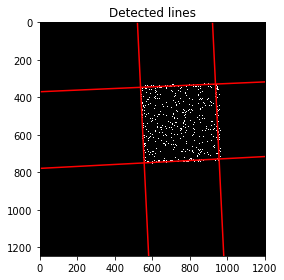

/Users/edwardtaylor/Year 4 Project/HoughTransform.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  x = (c1-c2) / (m2-m1)


In [2]:
dark_image = LAS.avg_bunch(dark[0])
img_for_roi = dark_image-LAS.avg_bunch(data[0])
ROI_pts = HT.cross_points(img_for_roi,HT.hough_grid(img_for_roi,thresh_step=30))

In [62]:
data = [dat for dat in data if dat!= []]
def get_PV_Decay(data,ROI_pts,dark_img,integration_time):
    avg_PVs_in_ROI = [LAS.pixel_val(HT.four_point_transform(LAS.image_ret(image)-dark_image,ROI_pts))[0] for image in data[0]]
    std_PVs_in_ROI = [LAS.pixel_val(HT.four_point_transform(LAS.image_ret(image)-dark_image,ROI_pts))[1] for image in data[0]]
    num_points = len(avg_PVs_in_ROI)
    times = np.linspace(integration_time,(num_points+1)*integration_time,num_points)
    return avg_PVs_in_ROI, std_PVs_in_ROI, times
#might not be in the correct order
#will need to get std dev and return it

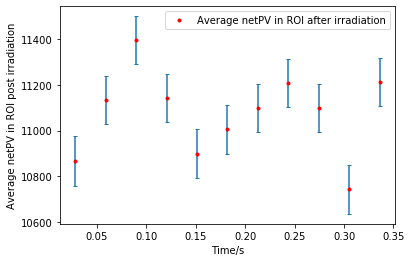

In [64]:
avg_PVs,std_dev_PVs,times = get_PV_Decay(data,ROI_pts,dark_image,integration_time)
plt.plot(times,avg_PVs,'r.',label='Average netPV in ROI after irradiation')
plt.errorbar(x=times,y=avg_PVs,yerr=std_dev_PVs,ls='None',capsize=2,barsabove=True)
plt.xlabel('Time/s')
plt.ylabel('Average netPV in ROI post irradiation')
plt.legend()
plt.show()